In [2]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run Cali_25_1212/load_Results_12_15a.py

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli


In [14]:
from scipy import stats as stats

In [5]:
# first load 12_15a for T1, T2
M1 = pd.read_csv('Cali_25_1212/Cali_Mats/M1_Cali_Beta.csv') 
M2 = pd.read_csv('Cali_25_1212/Cali_Mats/M2_Cali_Beta.csv') 
M1 = M1.loc[:, ~M1.columns.str.contains('^Unnamed')]
M2 = M2.loc[:, ~M2.columns.str.contains('^Unnamed')]


In [104]:
mean1 = M1.mean(0)
mean2 = M2.mean(0)


In [23]:
m1 = stats.tmean(M1, (.05, .99), axis = 0)
MaxI1 = np.median(M1, 0)
MaxI2 = np.median(M2, 0)


d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_stats_py.py:610: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis)


In [225]:
from matplotlib.pyplot import figure 
from numpy import array

def reli( pred, y ):
    bns= array([ 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65 ,.7, .75, .8   ])
    figure (figsize=(2.75,2.25))
    mli.plot_reliability_diagram( pred,   y, bins = bns, marker_size=100)

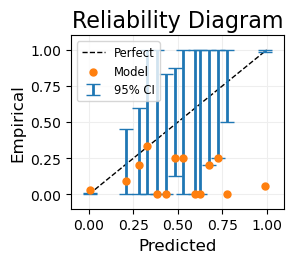

In [226]:
reli(M_test1['golds'], MaxI1)


In [ ]:
mli.plot_reliability_diagram(M_test1['golds'], MaxI1, marker_size=150)


In [108]:
X1 = M1.to_numpy().transpose()
X2 = M2.to_numpy().transpose()


In [208]:
import sklearn
from sklearn.metrics import confusion_matrix

In [113]:

def trim_upper(data):
    # proportiontocut=.2
    sorted_data = np.sort(data)
    n = len(sorted_data)
    k = int(n * .2)
    return np.quantile(sorted_data[0:n-k], .75)

def trim_lower(data):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    k = int(n * .2)
    return np.quantile(sorted_data[k:n], .25)
 
def trim_upper_b(data):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    k = int(n * .2)
    return np.quantile(sorted_data[0:n-k], .2)

def trim_lower_b(data):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    k = int(n * .2)
    return np.quantile(sorted_data[k:n], .8)

7.0
5.0


In [111]:
UQ1 = np.apply_along_axis(trim_upper, 1, X1)
LQ1 = np.apply_along_axis(trim_lower, 1, X1)

In [139]:
UQ1b = np.apply_along_axis(trim_upper_b, 1, X1)
LQ1b = np.apply_along_axis(trim_lower_b, 1, X1)

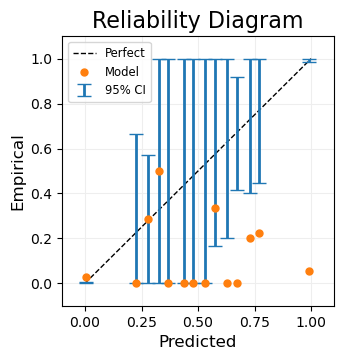

In [143]:
reli(M_test1['golds'], LQ1)

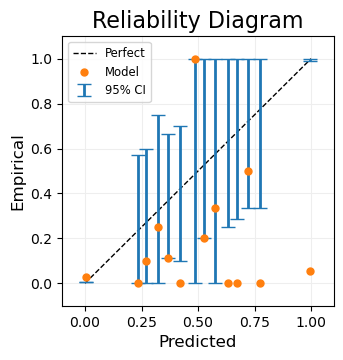

In [145]:
reli(M_test1['golds'], UQ1)

In [219]:
O1 =  np.where ( X1.mean(1)>.35, UQ1, UQ1b)

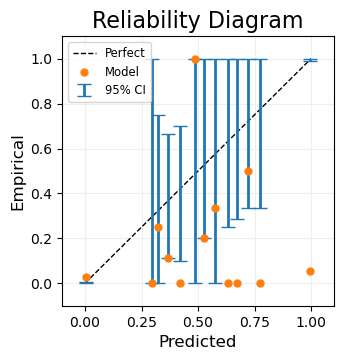

In [220]:
reli(M_test1['golds'], O1)

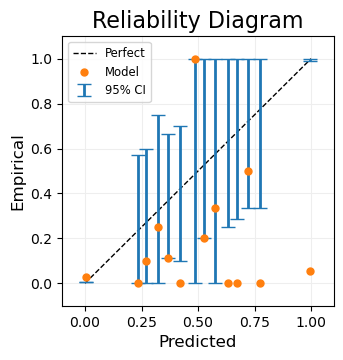

In [137]:
reli(M_test1['golds'], UQ1)

In [229]:
sum(tgold1)

471

In [209]:
sklearn.metrics.roc_auc_score(tgold1,  UQ1 , average = 'samples')
( confusion_matrix (tgold1,  UQ1>.5) )

array([[14796,   791],
       [  420,    51]], dtype=int64)

In [228]:
sklearn.metrics.roc_auc_score(tgold1,  O1 , average = 'samples')
( confusion_matrix (tgold1,  O1>.5) )

array([[14796,   791],
       [  420,    51]], dtype=int64)

In [211]:
sklearn.metrics.roc_auc_score(tgold1,  tp1 , average = 'samples')


0.6720970453220789

In [258]:
( confusion_matrix (tgold2,  X2.max(1)>.5) )

array([[11762,  2190],
       [  147,    72]], dtype=int64)

In [261]:
( confusion_matrix (tgold2,  np.quantile(X2 , .99,1 )>.5) )

array([[12363,  1589],
       [  159,    60]], dtype=int64)

## Calibrate M2

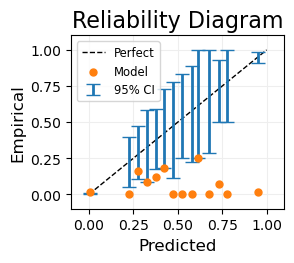

In [377]:
%run Cali_25_1212/Cali_Func.py

UQ2 = np.apply_along_axis(trim_upper_d, 1, X2)
LQ2 = np.apply_along_axis(trim_lower_d, 1, X2)
reli(M_test2['golds'], LQ2)


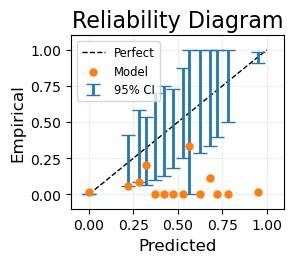

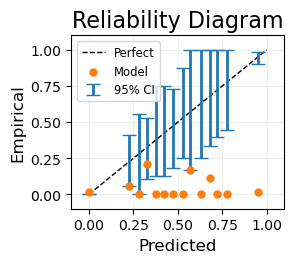

In [232]:
reli(M_test2['golds'], np.apply_along_axis(trim_upper_c, 1, X2))
reli(M_test2['golds'], np.apply_along_axis(trim_lower_c, 1, X2))

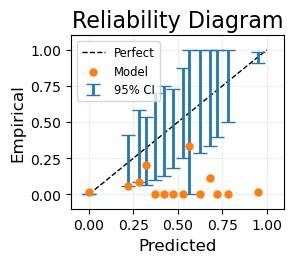

In [288]:
reli(M_test2['golds'], Q2c)

In [370]:
O2a =  np.where (np.quantile(X2, .99, 1 ) >.85, 
                 X2.max(1),
                Q2c
                )

In [371]:
( confusion_matrix (tgold2,   O2a>.5) )

array([[13619,   333],
       [  205,    14]], dtype=int64)

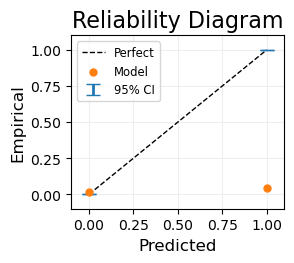

In [372]:
reli (tgold2, O2a)

In [375]:

def reli2 ( pred, y ):
    bns= array([.0,.05, .1, 0.2 , 0.25,    #0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65 ,.7, .75, .8, .9, .95, 1   ])
    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram( pred,   y, #bins = bns, 
                                 marker_size=100, scaling='logit')

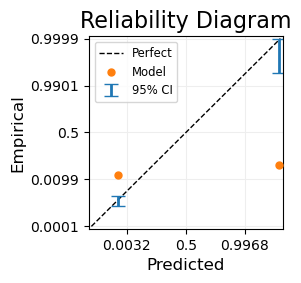

In [376]:
reli2(tgold2, O2a)

In [263]:
O2 =  np.where ( X2.mean(1)<.25, 
                np.apply_along_axis(trim_upper, 1, X2), 
                X2.max(1))

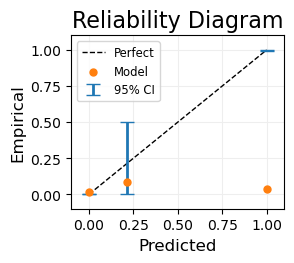

In [264]:
reli(M_test2['golds'], O2)

In [265]:
( confusion_matrix (tgold2,  O2>.5) )

array([[13729,   223],
       [  211,     8]], dtype=int64)

In [244]:
O2b =  np.where ( X2.mean(1)>.5, 
                np.apply_along_axis(trim_lower_d, 1, X2), 
                np.apply_along_axis(trim_upper_c, 1, X2))

In [245]:
( confusion_matrix (tgold2,  O2b>.5) )

array([[13784,   168],
       [  215,     4]], dtype=int64)

In [231]:
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples')


0.6764948839596163

In [ ]:
# first load 12_12 for T3, T4


In [27]:
sklearn.metrics.roc_auc_score(tgold1,  tc1 , average = 'samples')
( confusion_matrix (tgold1,  tc1>.5) )


0.6667921165559247

In [28]:
sklearn.metrics.roc_auc_score(tgold2,  tc2 , average = 'samples')


0.6764938403022082

In [29]:
sklearn.metrics.roc_auc_score(tgold3,  tc3 , average = 'samples')
( confusion_matrix (tgold3,  tc3>.5) )


0.7132108023602834

In [30]:
sklearn.metrics.roc_auc_score(tgold4,  tc4 , average = 'samples')


0.754709382855384

array([[6778, 8874],
       [  95,  385]], dtype=int64)

In [32]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[11112,  2894],
       [  133,    87]], dtype=int64)

In [33]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12240,   436],
       [  139,    14]], dtype=int64)

In [34]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[11578,     2],
       [  101,     0]], dtype=int64)

In [231]:
( confusion_matrix (tgold1,  tp1>.05) )

array([[ 1657, 13862],
       [   10,   496]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [27]:
m1.to_csv('output/XCoh_Sen.csv') 

In [34]:
#m1.to_excel('output/dxMD_Sensitivity90.xlsx') 

In [39]:
y1 = np.array(M1['golds'],dtype = int)
x1 = M1['probs'].to_numpy()
platt.fit(x1, y1)
cal_1 = platt.predict(M_test1['probs'])